## Prepare

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, root_mean_squared_log_error, mean_absolute_error, r2_score

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

## Path and Files

In [4]:
train_path = r"C:\Users\ganlu\Documents\STUDY\Self_Learning\Projects\Kaggle_Cases\Regression_with_an_Insurance_Dataset\data\train.csv"
test_path = r"C:\Users\ganlu\Documents\STUDY\Self_Learning\Projects\Kaggle_Cases\Regression_with_an_Insurance_Dataset\data\test.csv"

In [24]:
train_df = pd.read_csv(train_path)

## EDA

In [6]:
train_df.head(5)

id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0   0  19.0  Female        10049.0        Married                   1.0   
1   1  39.0  Female        31678.0       Divorced                   3.0   
2   2  23.0    Male        25602.0       Divorced                   3.0   
3   3  21.0    Male       141855.0        Married                   2.0   
4   4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location    Policy Type  \
0      Bachelor's  Self-Employed     22.598761     Urban        Premium   
1        Master's            NaN     15.569731     Rural  Comprehensive   
2     High School  Self-Employed     47.177549  Suburban        Premium   
3      Bachelor's            NaN     10.938144     Rural          Basic   
4      Bachelor's  Self-Employed     20.376094     Rural        Premium   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0              2.0         17.0         372.0                 5.0   
1              1.0         12.0         694.0                 2.0   
2              1.0         14.0           NaN                 3.0   
3              1.0          0.0         367.0                 1.0   
4              0.0          8.0         598.0                 4.0   

            Policy Start Date Customer Feedback Smoking Status  \
0  2023-12-23 15:21:39.134960              Poor             No   
1  2023-06-12 15:21:39.111551           Average            Yes   
2  2023-09-30 15:21:39.221386              Good            Yes   
3  2024-06-12 15:21:39.226954              Poor            Yes   
4  2021-12-01 15:21:39.252145              Poor            Yes   

  Exercise Frequency Property Type  Premium Amount  
0             Weekly         House          2869.0  
1            Monthly         House          1483.0  
2             Weekly         House           567.0  
3              Daily     Apartment           765.0  
4             Weekly         House          2022.0

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [8]:
train_df.describe().T

count           mean            std         min  \
id                    1200000.0  599999.500000  346410.305852    0.000000   
Age                   1181295.0      41.145563      13.539950   18.000000   
Annual Income         1155051.0   32745.217777   32179.506124    1.000000   
Number of Dependents  1090328.0       2.009934       1.417338    0.000000   
Health Score          1125924.0      25.613908      12.203462    2.012237   
Previous Claims        835971.0       1.002689       0.982840    0.000000   
Vehicle Age           1199994.0       9.569889       5.776189    0.000000   
Credit Score          1062118.0     592.924350     149.981945  300.000000   
Insurance Duration    1199999.0       5.018219       2.594331    1.000000   
Premium Amount        1200000.0    1102.544822     864.998859   20.000000   

                                25%            50%            75%  \
id                    299999.750000  599999.500000  899999.250000   
Age                       30.000000      41.000000      53.000000   
Annual Income           8001.000000   23911.000000   44634.000000   
Number of Dependents       1.000000       2.000000       3.000000   
Health Score              15.918959      24.578648      34.527209   
Previous Claims            0.000000       1.000000       2.000000   
Vehicle Age                5.000000      10.000000      15.000000   
Credit Score             468.000000     595.000000     721.000000   
Insurance Duration         3.000000       5.000000       7.000000   
Premium Amount           514.000000     872.000000    1509.000000   

                               max  
id                    1.199999e+06  
Age                   6.400000e+01  
Annual Income         1.499970e+05  
Number of Dependents  4.000000e+00  
Health Score          5.897591e+01  
Previous Claims       9.000000e+00  
Vehicle Age           1.900000e+01  
Credit Score          8.490000e+02  
Insurance Duration    9.000000e+00  
Premium Amount        4.999000e+03

In [9]:
for col in train_df.columns:
    print(col, ": ", train_df[col].nunique())

id :  1200000
Age :  47
Gender :  2
Annual Income :  88593
Marital Status :  3
Number of Dependents :  5
Education Level :  4
Occupation :  3
Health Score :  532657
Location :  3
Policy Type :  3
Previous Claims :  10
Vehicle Age :  20
Credit Score :  550
Insurance Duration :  9
Policy Start Date :  167381
Customer Feedback :  3
Smoking Status :  2
Exercise Frequency :  4
Property Type :  3
Premium Amount :  4794


In [10]:
for col in list(train_df.columns):
    print(col, ": ", train_df[col].unique())

id :  [      0       1       2 ... 1199997 1199998 1199999]
Age :  [19. 39. 23. 21. 29. 41. 48. 44. 56. 25. 40. 18. 59. 34. 22. 46. 49. 42.
 43. 64. 52. 37. 58. 50. 35. 61. 31. 54. 45. 30. 33. 28. 62. 53. 47. 27.
 nan 38. 63. 32. 36. 20. 51. 55. 57. 24. 60. 26.]
Gender :  ['Female' 'Male']
Annual Income :  [ 10049.  31678.  25602. ... 125361. 137940.  40368.]
Marital Status :  ['Married' 'Divorced' 'Single' nan]
Number of Dependents :  [ 1.  3.  2.  0.  4. nan]
Education Level :  ["Bachelor's" "Master's" 'High School' 'PhD']
Occupation :  ['Self-Employed' nan 'Employed' 'Unemployed']
Health Score :  [22.59876067 15.56973099 47.17754929 ... 47.09690866 13.6616783
 11.48348225]
Location :  ['Urban' 'Rural' 'Suburban']
Policy Type :  ['Premium' 'Comprehensive' 'Basic']
Previous Claims :  [ 2.  1.  0. nan  3.  4.  5.  6.  7.  8.  9.]
Vehicle Age :  [17. 12. 14.  0.  8.  4. 11. 10.  9.  6. 19.  3. 15. 16.  5.  7. 18.  1.
  2. 13. nan]
Credit Score :  [372. 694.  nan 367. 598. 614. 807. 398.

In [11]:
numerical_cols = ["Age", "Annual Income", "Health Score", "Credit Score", "Premium Amount"]
categorical_cols = ["Gender", "Marital Status", "Number of Dependents", "Education Level", "Occupation", "Location", "Policy Type", "Previous Claims", "Vehicle Age", "Insurance Duration",
                    "Customer Feedback", "Smoking Status", "Exercise Frequency", "Property Type"]

(array([104887.,  44143.,  38565.,  43567.,  72500.,  95805.,  86059.,
         74974.,  67949.,  58001.,  54143.,  46943.,  43031.,  38320.,
         32234.,  31541.,  27058.,  24597.,  21060.,   6260.,  22301.,
         22970.,  14198.,  15485.,  14227.,  12441.,  10905.,   9686.,
          9665.,   7291.,   6682.,   6918.,   5947.,   5089.,   3994.,
          3108.,   2388.,   2090.,   2795.,   2265.,   1948.,    661.,
           639.,    536.,    501.,   1040.,    331.,    363.,    969.,
           930.]),
 array([  20.  ,  119.58,  219.16,  318.74,  418.32,  517.9 ,  617.48,
         717.06,  816.64,  916.22, 1015.8 , 1115.38, 1214.96, 1314.54,
        1414.12, 1513.7 , 1613.28, 1712.86, 1812.44, 1912.02, 2011.6 ,
        2111.18, 2210.76, 2310.34, 2409.92, 2509.5 , 2609.08, 2708.66,
        2808.24, 2907.82, 3007.4 , 3106.98, 3206.56, 3306.14, 3405.72,
        3505.3 , 3604.88, 3704.46, 3804.04, 3903.62, 4003.2 , 4102.78,
        4202.36, 4301.94, 4401.52, 4501.1 , 4600.68, 4700.

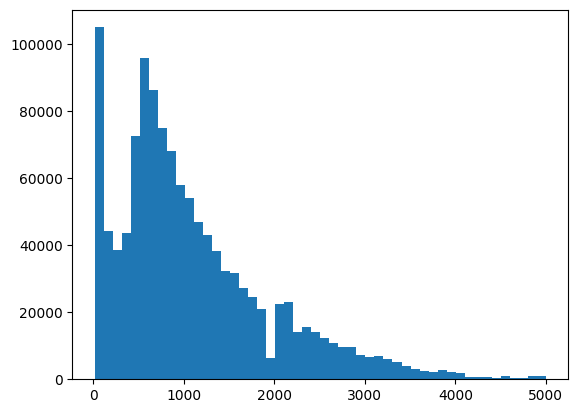

In [12]:
plt.hist(train_df["Premium Amount"], bins=50)

(array([ 5909., 11693.,  9867.,  6026.,  6430.,  7930.,  3515.,  9407.,
         3444.,  1774.,  2853.,  3205.,  3625.,  3750.,  9986., 15473.,
         8694.,  6018.,  8917.,  7667.,  8520., 10634., 10082., 11709.,
        11957., 11198., 25756., 23396., 43493., 53117., 58741., 61353.,
        63033., 67451., 67933., 58824., 58100., 61994., 53750., 53009.,
        46906., 28766., 47358., 38279., 30267., 22914., 17682.,  9730.,
         4123.,  3742.]),
 array([3.04452244, 3.15397585, 3.26342927, 3.37288268, 3.4823361 ,
        3.59178951, 3.70124293, 3.81069634, 3.92014976, 4.02960317,
        4.13905659, 4.24851   , 4.35796342, 4.46741683, 4.57687025,
        4.68632366, 4.79577708, 4.90523049, 5.01468391, 5.12413732,
        5.23359074, 5.34304415, 5.45249757, 5.56195098, 5.6714044 ,
        5.78085781, 5.89031123, 5.99976464, 6.10921806, 6.21867147,
        6.32812489, 6.43757831, 6.54703172, 6.65648514, 6.76593855,
        6.87539197, 6.98484538, 7.0942988 , 7.20375221, 7.31320563

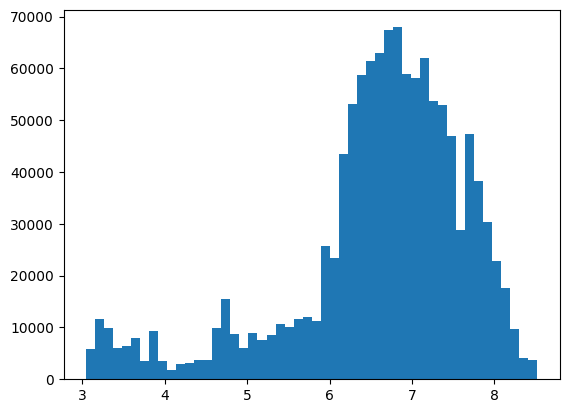

In [13]:
plt.hist(np.log1p(train_df["Premium Amount"]), bins=50)

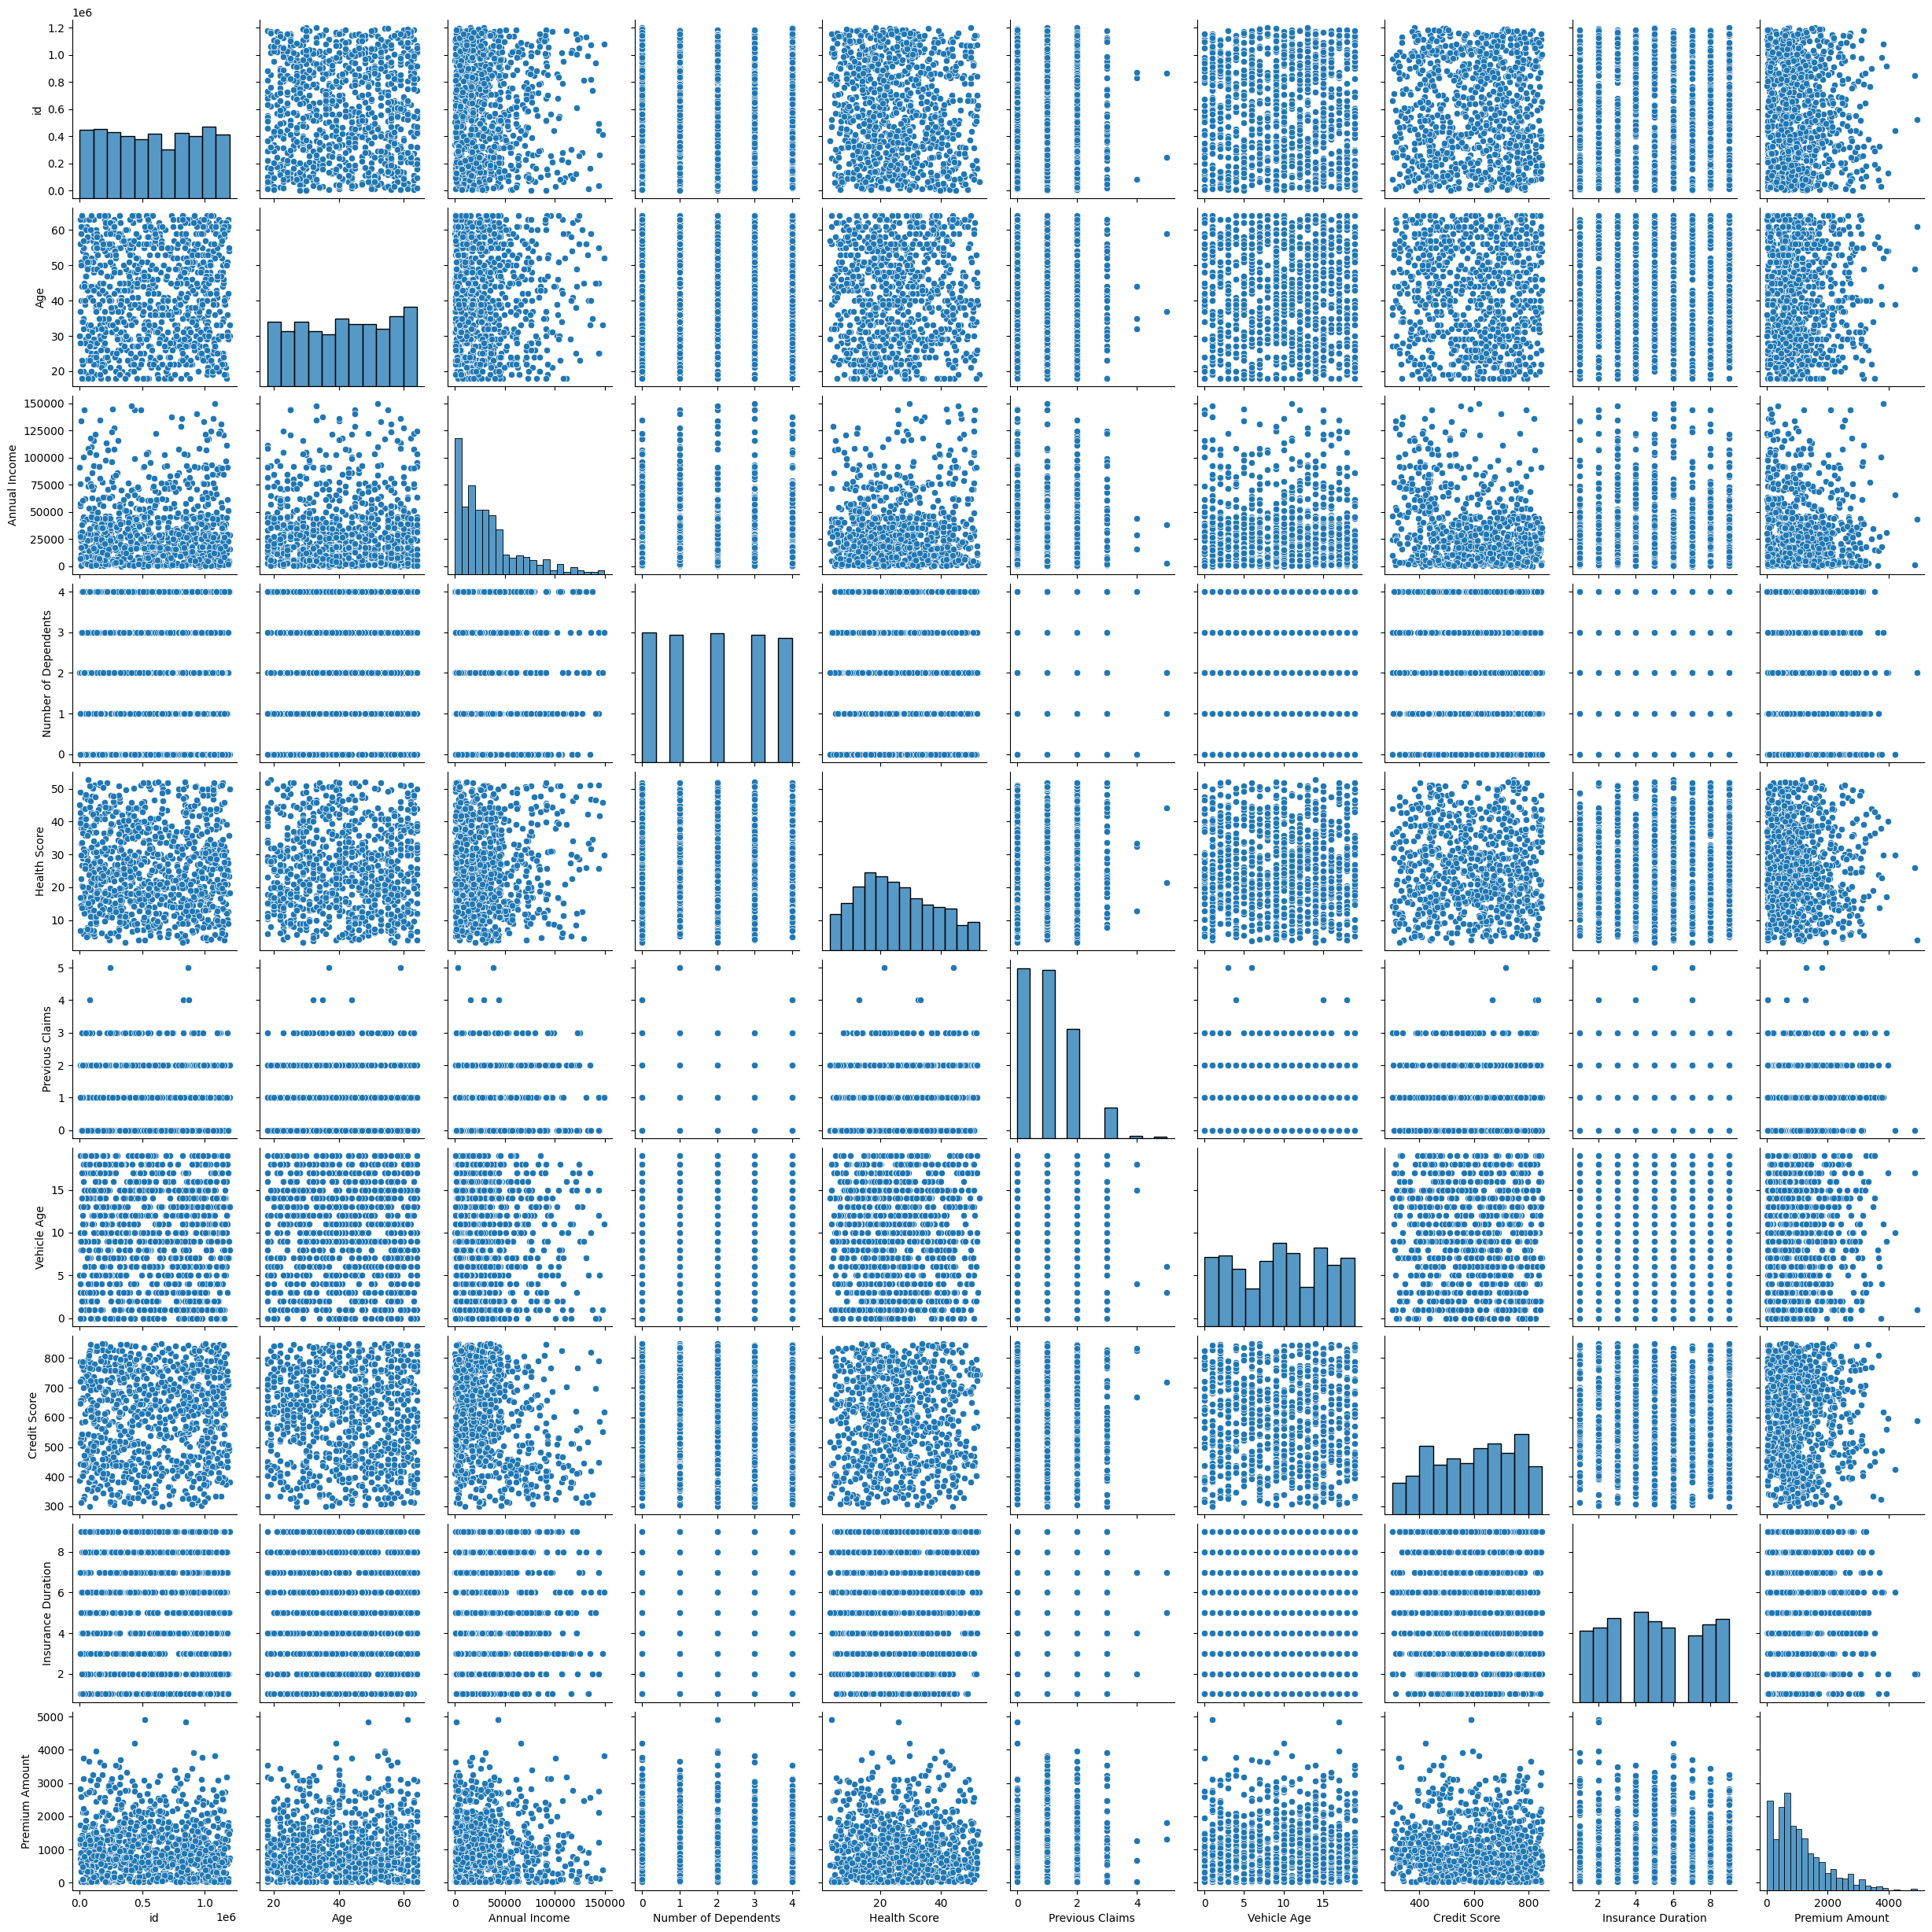

In [14]:
sns.pairplot(train_df.sample(n=1000))
plt.show()

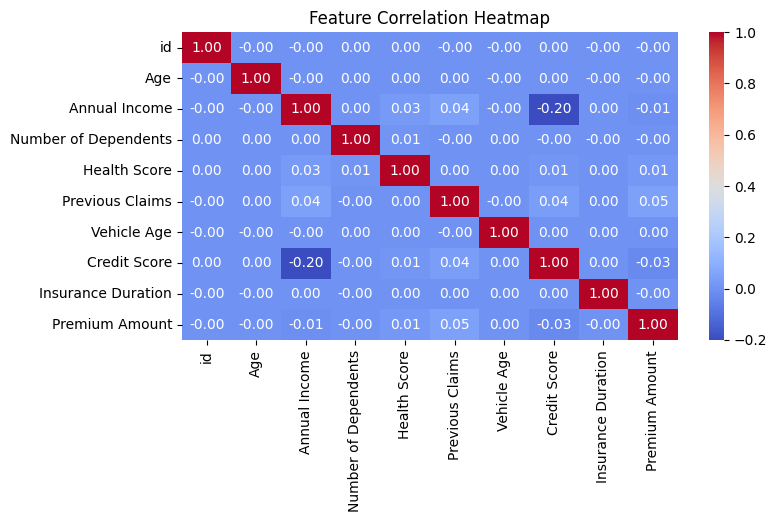

In [15]:
corr_df = train_df[["id", "Age", "Annual Income", "Number of Dependents", "Health Score", "Previous Claims", "Vehicle Age", "Credit Score", "Insurance Duration", "Premium Amount"]]
plt.figure(figsize=(8, 4))
sns.heatmap(corr_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

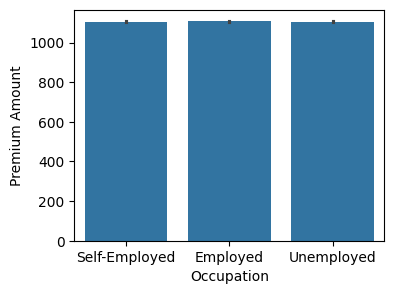

In [16]:
# Average Premium Amount for each Occupation category
plt.figure(figsize=(4, 3))
sns.barplot(data=train_df, x="Occupation", y="Premium Amount", estimator=np.mean)
plt.show()

(array([1.00000e+00, 7.00000e+00, 0.00000e+00, 4.00000e+00, 4.00000e+00,
        0.00000e+00, 4.00000e+00, 9.00000e+00, 4.00000e+00, 2.41000e+02,
        1.55000e+02, 8.06000e+02, 9.34000e+02, 6.16000e+02, 5.18000e+02,
        3.02000e+02, 3.66000e+02, 6.26000e+02, 4.67000e+02, 2.13000e+02,
        3.74000e+02, 4.25000e+02, 5.14000e+02, 2.12600e+03, 6.55700e+03,
        9.19800e+03, 1.21040e+04, 1.45610e+04, 1.70680e+04, 1.79230e+04,
        1.11880e+04, 1.87480e+04, 2.88820e+04, 3.36960e+04, 2.90550e+04,
        3.97500e+04, 4.87140e+04, 3.62420e+04, 4.11950e+04, 5.29210e+04,
        9.99960e+04, 6.93660e+04, 1.21613e+05, 8.16900e+04, 1.10516e+05,
        5.61760e+04, 6.21910e+04, 5.37880e+04, 3.58910e+04, 3.73060e+04]),
 array([ 0.69314718,  0.91765178,  1.14215638,  1.36666098,  1.59116559,
         1.81567019,  2.04017479,  2.26467939,  2.48918399,  2.71368859,
         2.93819319,  3.16269779,  3.38720239,  3.611707  ,  3.8362116 ,
         4.0607162 ,  4.2852208 ,  4.5097254 ,  4

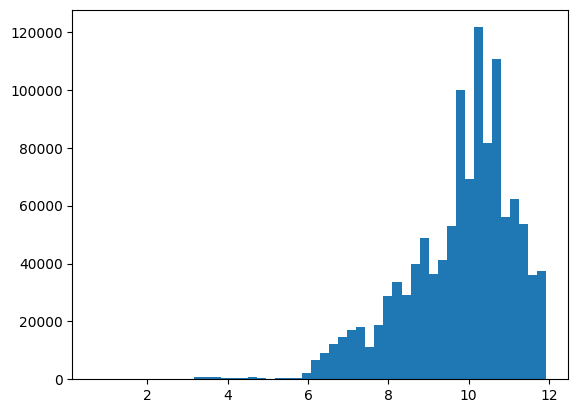

In [17]:
plt.hist(np.log1p(train_df["Annual Income"]), bins=50)
# plt.hist(train_df["Exercise Frequency"], bins=50)

## Primary Data Pre-processing

In [25]:
train_df["Log Premium Amount"] = np.log1p(train_df["Premium Amount"])

In [26]:
for col in train_df.columns:
    if train_df[col].dtype == "float64":
        train_df[col] = train_df[col].astype("float32")
    if train_df[col].dtype == "int64":
        train_df[col] = train_df[col].astype("int32")

In [ ]:
for col in train_df.columns:
    if train_df[col].dtype == "object":
        train_df[col].fillna("NAN")

In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   id                    1200000 non-null  int32   
 1   Age                   1181295 non-null  float32 
 2   Gender                1200000 non-null  category
 3   Annual Income         1155051 non-null  float32 
 4   Marital Status        1181471 non-null  category
 5   Number of Dependents  1090328 non-null  float32 
 6   Education Level       1200000 non-null  category
 7   Occupation            841925 non-null   category
 8   Health Score          1125924 non-null  float32 
 9   Location              1200000 non-null  category
 10  Policy Type           1200000 non-null  category
 11  Previous Claims       835971 non-null   float32 
 12  Vehicle Age           1199994 non-null  float32 
 13  Credit Score          1062118 non-null  float32 
 14  Insurance Duration

## Train Data Split

In [47]:
X = train_df.drop(columns=["id", "Premium Amount", "Log Premium Amount"])
y = train_df["Log Premium Amount"]

In [58]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

## Transform some variables

##### Train Set

In [56]:
def process_date(df):

    df["Policy Start Date"] = pd.to_datetime(df["Policy Start Date"])

    df["Policy Start Year"] = df["Policy Start Date"].dt.year.astype("float32")
    df["Policy Start Month"] = df["Policy Start Date"].dt.month.astype("float32")
    df["Policy Start Month Name"] = df["Policy Start Date"].dt.month_name()
    df["Policy Start Day"] = df["Policy Start Date"].dt.day.astype("float32")
    df["Policy Start DOW Name"] = df["Policy Start Date"].dt.day_name()
    df["Policy Start DOW"] = df["Policy Start Date"].dt.dayofweek.astype("float32")

    min_year = df["Policy Start Year"].min()
    max_year = df["Policy Start Year"].max()

    df["Year sin"] = np.sin(2 * np.pi * (df["Policy Start Year"] - min_year) / (max_year - min_year)).astype("float32")
    df["Year cos"] = np.cos(2 * np.pi * (df["Policy Start Year"] - min_year) / (max_year - min_year)).astype("float32")
    df["Month sin"] = np.sin(2 * np.pi * df["Policy Start Month"] / 12).astype("float32")
    df["Month cos"] = np.cos(2 * np.pi * df["Policy Start Month"] / 12).astype("float32")
    df["Day sin"] = np.sin(2 * np.pi * df["Policy Start Day"] / 31).astype("float32")
    df["Day cos"] = np.cos(2 * np.pi * df["Policy Start Day"] / 31).astype("float32")

    df["Group"] = (df["Policy Start Year"] - 2019) * 48 + df["Policy Start Month"] * 4 + df["Policy Start Day"] // 7

    df = df.drop(columns=["Policy Start Date"])

    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = df[col].astype("category")

    return df

In [50]:
def process_new_field(df):

    df["Insurance_Age_Ratio"] = (df["Insurance Duration"] / (df["Vehicle Age"] + 0.1)).astype("float32")
    df["Credit_Health_Interaction"] = (df["Credit Score"] * df["Health Score"]).astype("float32")
    df["Income_Vehicle_Ratio"] = (df["Annual Income"] / (df["Vehicle Age"] + 0.1).astype("float32"))

    df["Log Annual Income"] = np.log1p(df["Annual Income"])
    df = df.drop(columns=["Annual Income"])

    return df

In [59]:
X_train = process_date(X_train)
X_train = process_new_field(X_train)

In [60]:
X_valid = process_date(X_valid)
X_valid = process_new_field(X_valid)

In [61]:
X_train

Age  Gender Marital Status  Number of Dependents Education Level  \
404339  45.0    Male       Divorced                   3.0      Bachelor's   
748487  51.0  Female        Married                   1.0             PhD   
435951  48.0  Female       Divorced                   0.0        Master's   
311284  43.0  Female       Divorced                   0.0             PhD   
318790  18.0    Male        Married                   NaN      Bachelor's   
...      ...     ...            ...                   ...             ...   
110268  30.0  Female         Single                   4.0     High School   
259178  35.0    Male       Divorced                   2.0      Bachelor's   
131932  43.0    Male        Married                   0.0      Bachelor's   
671155  49.0    Male       Divorced                   0.0      Bachelor's   
121958  57.0  Female         Single                   2.0             PhD   

        Occupation  Health Score  Location    Policy Type  Previous Claims  \
404339         NaN     43.926884     Urban  Comprehensive              NaN   
748487         NaN     41.854229     Rural          Basic              NaN   
435951         NaN     51.750191     Urban  Comprehensive              1.0   
311284  Unemployed     20.666786     Urban  Comprehensive              2.0   
318790         NaN     36.995102     Urban          Basic              NaN   
...            ...           ...       ...            ...              ...   
110268         NaN     15.965779  Suburban          Basic              NaN   
259178    Employed     23.914244     Urban  Comprehensive              0.0   
131932         NaN     25.151808     Urban        Premium              0.0   
671155    Employed     41.637978     Rural  Comprehensive              0.0   
121958         NaN           NaN     Urban        Premium              NaN   

        Vehicle Age  Credit Score  Insurance Duration Customer Feedback  \
404339          1.0         311.0                 2.0              Poor   
748487          1.0         634.0                 8.0              Poor   
435951         12.0         759.0                 9.0              Poor   
311284          8.0         460.0                 1.0           Average   
318790         18.0         831.0                 3.0              Poor   
...             ...           ...                 ...               ...   
110268         18.0         328.0                 5.0              Good   
259178         16.0         338.0                 9.0              Poor   
131932          8.0         849.0                 3.0           Average   
671155          2.0         444.0                 1.0              Good   
121958         19.0         831.0                 3.0              Poor   

       Smoking Status Exercise Frequency Property Type  Policy Start Year  \
404339             No             Rarely         House             2024.0   
748487            Yes            Monthly         Condo             2020.0   
435951            Yes             Rarely         Condo             2021.0   
311284             No            Monthly         Condo             2022.0   
318790            Yes            Monthly     Apartment             2021.0   
...               ...                ...           ...                ...   
110268             No             Rarely     Apartment             2020.0   
259178             No              Daily         House             2022.0   
131932            Yes              Daily         Condo             2023.0   
671155            Yes            Monthly         Condo             2019.0   
121958            Yes            Monthly     Apartment             2022.0   

        Policy Start Month Policy Start Month Name  Policy Start Day  \
404339                 8.0                  August              11.0   
748487                 6.0                    June              20.0   
435951                 2.0                February               5.0   
311284                11.0       

In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960000 entries, 404339 to 121958
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   Age                        944952 non-null  float32 
 1   Gender                     960000 non-null  category
 2   Marital Status             945137 non-null  category
 3   Number of Dependents       872136 non-null  float32 
 4   Education Level            960000 non-null  category
 5   Occupation                 673379 non-null  category
 6   Health Score               900671 non-null  float32 
 7   Location                   960000 non-null  category
 8   Policy Type                960000 non-null  category
 9   Previous Claims            668845 non-null  float32 
 10  Vehicle Age                959996 non-null  float32 
 11  Credit Score               849726 non-null  float32 
 12  Insurance Duration         959999 non-null  float32 
 13  Customer Feedb

In [63]:
for col in X_train.columns:
    print(col, f"({X_train[col].dtype}):", X_train[col].nunique())

Age (float32): 47
Gender (category): 2
Marital Status (category): 3
Number of Dependents (float32): 5
Education Level (category): 4
Occupation (category): 3
Health Score (float32): 386871
Location (category): 3
Policy Type (category): 3
Previous Claims (float32): 9
Vehicle Age (float32): 20
Credit Score (float32): 550
Insurance Duration (float32): 9
Customer Feedback (category): 3
Smoking Status (category): 2
Exercise Frequency (category): 4
Property Type (category): 3
Policy Start Year (float32): 6
Policy Start Month (float32): 12
Policy Start Month Name (category): 12
Policy Start Day (float32): 31
Policy Start DOW Name (category): 7
Policy Start DOW (float32): 7
Year sin (float32): 6
Year cos (float32): 5
Month sin (float32): 12
Month cos (float32): 12
Day sin (float32): 31
Day cos (float32): 30
Group (float32): 241
Insurance_Age_Ratio (float32): 180
Credit_Health_Interaction (float32): 708092
Income_Vehicle_Ratio (float32): 416247
Log Annual Income (float32): 84404


## XGB Model 1

In [ ]:
N_FOLDS = 10

# Define objective function for hyperparameter tuning
def objective(trial):
    params = {
        "tree_method": "gpu_hist",  # GPU accelerate
        "objective": "reg:squaredlogerror",  # RMSLE target function
        "eval_metric": "rmsle",  # Using RMSLE for evaluation
        "max_depth": trial.suggest_int("max_depth", 3, 10), # Tree max depth
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True), # Learning rate
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=50), # Number of trees
        "subsample": trial.suggest_float("subsample", 0.5, 1.0), # Sample proportion
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0), 
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.5, 1.0),
        "min_child_weight": trial.suggest_float("min_child_weight", 1, 10),
        "lambda": trial.suggest_float("lambda", 1e-3, 10.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-3, 10.0, log=True), # L2 regularization
        "gamma": trial.suggest_float("gamma", 0, 5), # L1 regularization
    }

    # K-Fold
    kf = KFold(n_splits=N_FOLDS, shuffle=True, random_state=42)
    rmsle_scores = []  # Save RMSLE for each fold

    for train_idx, valid_idx in kf.split(X_train):
        X_t, X_v = X_train.iloc[train_idx], X_train.iloc[valid_idx]
        y_t, y_v = y_train.iloc[train_idx], y_train.iloc[valid_idx]

        y_t = np.maximum(y_t, 1e-6)
        y_v = np.maximum(y_v, 1e-6)

        dtrain = xgb.DMatrix(X_t, label=y_t, enable_categorical=True)
        dvalid = xgb.DMatrix(X_v, label=y_v, enable_categorical=True)

        model = xgb.train(
            params,
            dtrain,
            evals=[(dvalid, "validation")], # Monitor validation set
            num_boost_round=trial.suggest_int("num_boost_round", 100, 1000, step=50), # number of rounds
            early_stopping_rounds=50,
            verbose_eval=False # No training log
        )

        preds = model.predict(dvalid)
        preds = np.maximum(preds, 1e-6)

        rmsle = np.sqrt(root_mean_squared_log_error(y_v, preds))
        rmsle_scores.append(rmsle)


    return np.mean(rmsle_scores)

In [100]:
# Optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)  # 50 times search

[I 2025-04-02 23:15:53,009] A new study created in memory with name: no-name-e30ebc77-7021-40b5-b6ef-14e200c0055c
c:\Users\ganlu\Software\Anaconda\Install\envs\pytorch_gpu\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:15:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  self.starting_round = model.num_boosted_rounds()
c:\Users\ganlu\Software\Anaconda\Install\envs\pytorch_gpu\Lib\site-packages\xgboost\callback.py:386: UserWarning: [23:15:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()
c:\Users\ganlu\Software\Anaconda\Install\envs\pytorch_gpu\Lib\site-packages\xgboost\core.py:729: UserWarning: [23:15:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src

In [101]:
best_params = study.best_params

In [102]:
print("Best hyperparameters:", best_params)

Best hyperparameters: {'max_depth': 7, 'learning_rate': 0.02542863710218864, 'n_estimators': 200, 'subsample': 0.6210149125005451, 'colsample_bytree': 0.8552873502228534, 'colsample_bylevel': 0.9085850197719483, 'min_child_weight': 5.410688030875427, 'lambda': 0.025800250187837003, 'alpha': 1.5202699764268577, 'gamma': 0.2320744620021105, 'num_boost_round': 900}


Best hyperparameters: {'max_depth': 7, 'learning_rate': 0.02542863710218864, 'n_estimators': 200, 'subsample': 0.6210149125005451, 'colsample_bytree': 0.8552873502228534, 'colsample_bylevel': 0.9085850197719483, 'min_child_weight': 5.410688030875427, 'lambda': 0.025800250187837003, 'alpha': 1.5202699764268577, 'gamma': 0.2320744620021105, 'num_boost_round': 900}

In [103]:
dtrain = xgb.DMatrix(X_train, label=np.maximum(y_train, 1e-6), enable_categorical=True)
dvalid = xgb.DMatrix(X_valid, label=np.maximum(y_valid, 1e-6), enable_categorical=True)

In [104]:
best_model = xgb.train(best_params, dtrain, num_boost_round=best_params["n_estimators"])

c:\Users\ganlu\Software\Anaconda\Install\envs\pytorch_gpu\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:01:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "num_boost_round" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [105]:
best_preds = best_model.predict(dvalid)
best_preds = np.maximum(best_preds, 1e-6)  # Make sure larger than 0

In [106]:
# Calculate RMSLE
rmsle = np.sqrt(mean_squared_error(y_valid, best_preds))
rmsle

np.float64(1.0473813213226375)

In [ ]:

rmse = np.sqrt(mean_squared_error(y_valid, best_preds))
mae = mean_absolute_error(y_valid, best_preds)
r2 = r2_score(y_valid, best_preds)
mape = np.mean(np.abs((y_valid - best_preds / y_valid))) * 100

In [ ]:
# Get feature importance
importance = best_model.get_score(importance_type="weight")  #or "gain", "cover"

In [ ]:
# Convert to orderable list
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Get ordered feature name and importance
features, scores = zip(*sorted_importance)

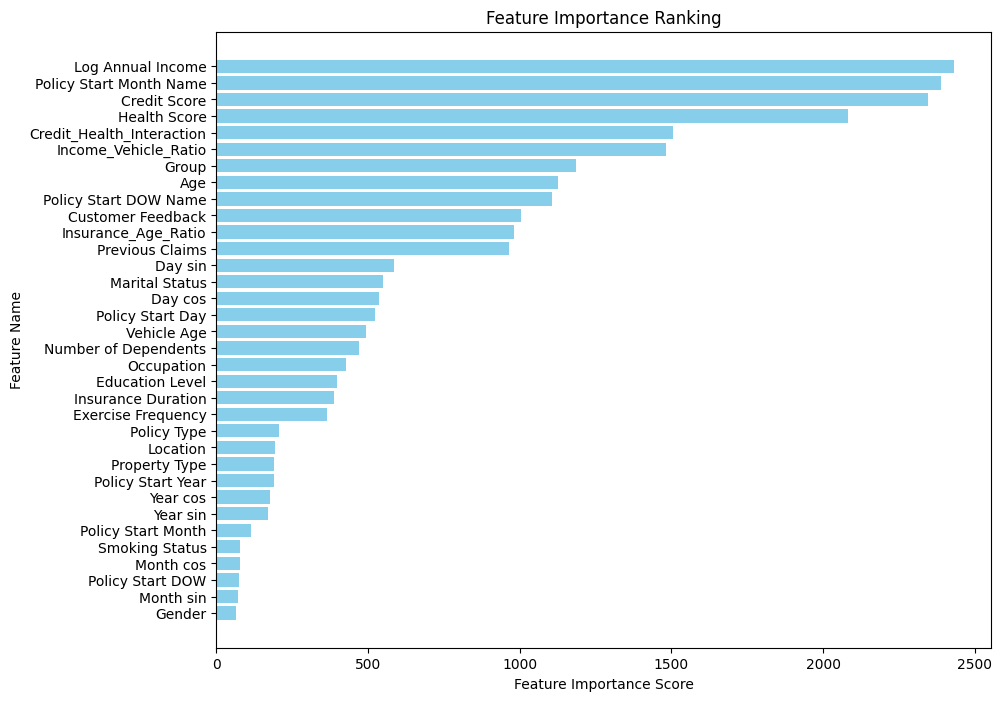

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(features, scores, color="skyblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.title("Feature Importance Ranking")
plt.gca().invert_yaxis()  # Higher importance on top
plt.show()

## Feature Engineering

#### Target Encoding Functions

In [ ]:
def target_encoding_train(train_set, agg_col, n_folds=10, agg="mean", smooth=10):
    """
    Target Encode Train dataset
    """

    # Assign a kfold column to dataframe and fill in fold number
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

    kfold_i = 1
    for t_idx, v_idx in kf.split(train_set):
        train_set.loc[v_idx, "kfold"] = kfold_i
        kfold_i += 1

    new_train_set = train_set.copy()

    for i in range(1, n_folds+1):

        # Get global aggregation value, in case agg value missing
        if agg == "mean":
            full_agg = train_set["Log Premium Amount"].mean()
        elif agg == "median":
            full_agg = train_set["Log Premium Amount"].median()
        elif agg == "min":
            full_agg = train_set["Log Premium Amount"].min()
        elif agg == "max":
            full_agg = train_set["Log Premium Amount"].max()
        elif agg == "nunique":
            full_agg = 0
        
        # Calculate target encoding value in agg_df
        agg_df = train_set[train_set["kfold"] != i].groupby(by=agg_col, observed=False).agg({"Log Premium Amount":[agg, "count"]}).reset_index()
        agg_df.columns = [agg_col, f"{agg}", "count"]

        if agg == "nunique":
            agg_df[f"{agg_col}_{agg.upper()}_TE"] = agg_df[agg] / agg_df["count"]
        else:
            agg_df[f"{agg_col}_{agg.upper()}_TE"] = ((agg_df[agg] * agg_df["count"]) + (full_agg * smooth)) / (agg_df["count"] + smooth)

        # Get only target encoding
        te_df = agg_df[[agg_col, f"{agg_col}_{agg.upper()}_TE"]]

        # Merge target encoding to train dataframe, and fill empty ones with global agg value
        merged_df = train_set.merge(te_df, on=agg_col, how="left")
        merged_df[f"{agg_col}_{agg.upper()}_TE"] = merged_df[f"{agg_col}_{agg.upper()}_TE"].fillna(full_agg)
        
        # Use merged_df to fill in actual train dataset corresponding rows
        new_train_set.loc[new_train_set['kfold'] == i, f"{agg_col}_{agg.upper()}_TE"] = merged_df.loc[merged_df['kfold'] == i, f"{agg_col}_{agg.upper()}_TE"]

    
    return new_train_set

In [243]:
def target_encoding_valid(train_set, valid_set, agg_col, agg="mean", smooth=10):
    """
    Target Encode Valide dataset
    """

    new_valid_set = valid_set.copy()

    # Get global aggregation value, in case agg value missing
    if agg == "mean":
        full_agg = train_set["Log Premium Amount"].mean()
    elif agg == "median":
        full_agg = train_set["Log Premium Amount"].median()
    elif agg == "min":
        full_agg = train_set["Log Premium Amount"].min()
    elif agg == "max":
        full_agg = train_set["Log Premium Amount"].max()
    elif agg == "nunique":
        full_agg = 0

    # Calculate target encoding value in agg_df
    agg_df = train_set.groupby(by=agg_col, observed=False).agg({"Log Premium Amount":[agg, "count"]}).reset_index()
    agg_df.columns = [agg_col, f"{agg}", "count"]
    
    if agg == "nunique":
        agg_df[f"{agg_col}_{agg.upper()}_TE"] = agg_df[agg] / agg_df["count"]
    else:
        agg_df[f"{agg_col}_{agg.upper()}_TE"] = ((agg_df[agg] * agg_df["count"]) + (full_agg * smooth)) / (agg_df["count"] + smooth)
    
    # Get only target encoding
    te_df = agg_df[[agg_col, f"{agg_col}_{agg.upper()}_TE"]]

    # Merge target encoding to valid dataframe, and fill empty ones with global agg value
    new_valid_set = valid_set.merge(te_df, on=agg_col, how="left")
    new_valid_set[f"{agg_col}_{agg.upper()}_TE"] = new_valid_set[f"{agg_col}_{agg.upper()}_TE"].fillna(full_agg)

    return new_valid_set

#### Process Target Encoding

In [113]:
X_train.head(3)

Age  Gender Marital Status  Number of Dependents Education Level  \
404339  45.0    Male       Divorced                   3.0      Bachelor's   
748487  51.0  Female        Married                   1.0             PhD   
435951  48.0  Female       Divorced                   0.0        Master's   

       Occupation  Health Score Location    Policy Type  Previous Claims  \
404339        NaN     43.926884    Urban  Comprehensive              NaN   
748487        NaN     41.854229    Rural          Basic              NaN   
435951        NaN     51.750191    Urban  Comprehensive              1.0   

        Vehicle Age  Credit Score  Insurance Duration Customer Feedback  \
404339          1.0         311.0                 2.0              Poor   
748487          1.0         634.0                 8.0              Poor   
435951         12.0         759.0                 9.0              Poor   

       Smoking Status Exercise Frequency Property Type  Policy Start Year  \
404339             No             Rarely         House             2024.0   
748487            Yes            Monthly         Condo             2020.0   
435951            Yes             Rarely         Condo             2021.0   

        Policy Start Month Policy Start Month Name  Policy Start Day  \
404339                 8.0                  August              11.0   
748487                 6.0                    June              20.0   
435951                 2.0                February               5.0   

       Policy Start DOW Name  Policy Start DOW      Year sin  Year cos  \
404339                Sunday               6.0  1.748456e-07  1.000000   
748487              Saturday               5.0  9.510565e-01  0.309017   
435951                Friday               4.0  5.877852e-01 -0.809017   

           Month sin  Month cos   Day sin   Day cos  Group  \
404339 -8.660254e-01       -0.5  0.790776 -0.612106  273.0   
748487 -8.742278e-08       -1.0 -0.790776 -0.612106   74.0   
435951  8.660254e-01        0.5  0.848644  0.528964  104.0   

        Insurance_Age_Ratio  Credit_Health_Interaction  Income_Vehicle_Ratio  \
404339             1.818182               13661.260742          83013.632812   
748487             7.272727               26535.582031           4800.000000   
435951             0.743802               39278.394531           3414.710693   

        Log Annual Income  
404339          11.422081  
748487           8.571871  
435951          10.629078

In [251]:
X_valid.head(3)

Age  Gender Marital Status  Number of Dependents Education Level  \
372605  52.0  Female        Married                   NaN        Master's   
551204  60.0  Female        Married                   4.0      Bachelor's   
240320  58.0  Female        Married                   2.0      Bachelor's   

       Occupation  Health Score  Location    Policy Type  Previous Claims  \
372605   Employed      8.093144     Rural          Basic              0.0   
551204   Employed           NaN  Suburban  Comprehensive              0.0   
240320        NaN     34.452480     Urban  Comprehensive              2.0   

        Vehicle Age  Credit Score  Insurance Duration Customer Feedback  \
372605         18.0         497.0                 3.0           Average   
551204          3.0         340.0                 3.0              Poor   
240320         19.0           NaN                 7.0              Poor   

       Smoking Status Exercise Frequency Property Type  Policy Start Year  \
372605             No             Weekly     Apartment             2020.0   
551204             No             Weekly     Apartment             2020.0   
240320             No            Monthly         House             2021.0   

        Policy Start Month Policy Start Month Name  Policy Start Day  \
372605                 2.0                February              10.0   
551204                10.0                 October              16.0   
240320                 1.0                 January               2.0   

       Policy Start DOW Name  Policy Start DOW  Year sin  Year cos  Month sin  \
372605                Monday               0.0  0.951057  0.309017   0.866025   
551204                Friday               4.0  0.951057  0.309017  -0.866025   
240320              Saturday               5.0  0.587785 -0.809017   0.500000   

        Month cos   Day sin   Day cos  Group  Insurance_Age_Ratio  \
372605   0.500000  0.897804 -0.440394   57.0             0.165746   
551204   0.500000 -0.101168 -0.994869   90.0             0.967742   
240320   0.866025  0.394356  0.918958  100.0             0.366492   

        Credit_Health_Interaction  Income_Vehicle_Ratio  Log Annual Income  
372605                4022.292725            305.966858           8.619569  
551204                        NaN          12810.000000          10.589409  
240320                        NaN            123.769630           7.768533

In [250]:
# Combine a copy for train and valid data, including target col (y)
train_copy = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
valid_copy = pd.concat([X_valid, y_valid], axis=1).reset_index(drop=True)

In [252]:
train_copy.head(2)

Age  Gender Marital Status  Number of Dependents Education Level  \
0  45.0    Male       Divorced                   3.0      Bachelor's   
1  51.0  Female        Married                   1.0             PhD   

  Occupation  Health Score Location    Policy Type  Previous Claims  \
0        NaN     43.926884    Urban  Comprehensive              NaN   
1        NaN     41.854229    Rural          Basic              NaN   

   Vehicle Age  Credit Score  Insurance Duration Customer Feedback  \
0          1.0         311.0                 2.0              Poor   
1          1.0         634.0                 8.0              Poor   

  Smoking Status Exercise Frequency Property Type  Policy Start Year  \
0             No             Rarely         House             2024.0   
1            Yes            Monthly         Condo             2020.0   

   Policy Start Month Policy Start Month Name  Policy Start Day  \
0                 8.0                  August              11.0   
1                 6.0                    June              20.0   

  Policy Start DOW Name  Policy Start DOW      Year sin  Year cos  \
0                Sunday               6.0  1.748456e-07  1.000000   
1              Saturday               5.0  9.510565e-01  0.309017   

      Month sin  Month cos   Day sin   Day cos  Group  Insurance_Age_Ratio  \
0 -8.660254e-01       -0.5  0.790776 -0.612106  273.0             1.818182   
1 -8.742278e-08       -1.0 -0.790776 -0.612106   74.0             7.272727   

   Credit_Health_Interaction  Income_Vehicle_Ratio  Log Annual Income  \
0               13661.260742          83013.632812          11.422081   
1               26535.582031           4800.000000           8.571871   

   Log Premium Amount  
0            7.777792  
1            5.655992

In [ ]:
# Check dtype and unique categories in each column
for col in train_copy.columns:
    print(col, f"({train_copy[col].dtype}):", train_copy[col].nunique())

Age (float32): 47
Gender (category): 2
Marital Status (category): 3
Number of Dependents (float32): 5
Education Level (category): 4
Occupation (category): 3
Health Score (float32): 386871
Location (category): 3
Policy Type (category): 3
Previous Claims (float32): 9
Vehicle Age (float32): 20
Credit Score (float32): 550
Insurance Duration (float32): 9
Customer Feedback (category): 3
Smoking Status (category): 2
Exercise Frequency (category): 4
Property Type (category): 3
Policy Start Year (float32): 6
Policy Start Month (float32): 12
Policy Start Month Name (category): 12
Policy Start Day (float32): 31
Policy Start DOW Name (category): 7
Policy Start DOW (float32): 7
Year sin (float32): 6
Year cos (float32): 5
Month sin (float32): 12
Month cos (float32): 12
Day sin (float32): 31
Day cos (float32): 30
Group (float32): 241
Insurance_Age_Ratio (float32): 180
Credit_Health_Interaction (float32): 708092
Income_Vehicle_Ratio (float32): 416247
Log Annual Income (float32): 84404
Log Premium Amou

In [258]:
low_cardinality_cols = [col for col in train_copy.columns if train_copy[col].nunique() <= 10 and col != "Log Premium Amount"]
high_cardinality_cols = [col for col in train_copy.columns if train_copy[col].nunique() > 10 and col != "Log Premium Amount"]

In [260]:
high_cardinality_cols

['Age',
 'Health Score',
 'Vehicle Age',
 'Credit Score',
 'Policy Start Month',
 'Policy Start Month Name',
 'Policy Start Day',
 'Month sin',
 'Month cos',
 'Day sin',
 'Day cos',
 'Group',
 'Insurance_Age_Ratio',
 'Credit_Health_Interaction',
 'Income_Vehicle_Ratio',
 'Log Annual Income']

In [261]:
# Target Encode train dataset

for col in low_cardinality_cols:
    train_copy = target_encoding_train(train_copy, col, n_folds=10, agg="mean", smooth=20)
    train_copy = target_encoding_train(train_copy, col, n_folds=10, agg="median", smooth=0)

for col in high_cardinality_cols:
    train_copy = target_encoding_train(train_copy, col, n_folds=10, agg="min", smooth=0)
    train_copy = target_encoding_train(train_copy, col, n_folds=10, agg="max", smooth=0)
    train_copy = target_encoding_train(train_copy, col, n_folds=10, agg="nunique", smooth=0)

In [262]:
# Target Encode valid dataset

for col in low_cardinality_cols:
    valid_copy = target_encoding_valid(train_copy, valid_copy, col, agg="mean", smooth=20)
    valid_copy = target_encoding_valid(train_copy, valid_copy, col, agg="median", smooth=0)

for col in high_cardinality_cols:
    valid_copy = target_encoding_valid(train_copy, valid_copy, col, agg="min", smooth=0)
    valid_copy = target_encoding_valid(train_copy, valid_copy, col, agg="max", smooth=0)
    valid_copy = target_encoding_valid(train_copy, valid_copy, col, agg="nunique", smooth=0)

In [263]:
train_copy

Age  Gender Marital Status  Number of Dependents Education Level  \
0       45.0    Male       Divorced                   3.0      Bachelor's   
1       51.0  Female        Married                   1.0             PhD   
2       48.0  Female       Divorced                   0.0        Master's   
3       43.0  Female       Divorced                   0.0             PhD   
4       18.0    Male        Married                   NaN      Bachelor's   
...      ...     ...            ...                   ...             ...   
959995  30.0  Female         Single                   4.0     High School   
959996  35.0    Male       Divorced                   2.0      Bachelor's   
959997  43.0    Male        Married                   0.0      Bachelor's   
959998  49.0    Male       Divorced                   0.0      Bachelor's   
959999  57.0  Female         Single                   2.0             PhD   

        Occupation  Health Score  Location    Policy Type  Previous Claims  \
0              NaN     43.926884     Urban  Comprehensive              NaN   
1              NaN     41.854229     Rural          Basic              NaN   
2              NaN     51.750191     Urban  Comprehensive              1.0   
3       Unemployed     20.666786     Urban  Comprehensive              2.0   
4              NaN     36.995102     Urban          Basic              NaN   
...            ...           ...       ...            ...              ...   
959995         NaN     15.965779  Suburban          Basic              NaN   
959996    Employed     23.914244     Urban  Comprehensive              0.0   
959997         NaN     25.151808     Urban        Premium              0.0   
959998    Employed     41.637978     Rural  Comprehensive              0.0   
959999         NaN           NaN     Urban        Premium              NaN   

        Vehicle Age  Credit Score  Insurance Duration Customer Feedback  \
0               1.0         311.0                 2.0              Poor   
1               1.0         634.0                 8.0              Poor   
2              12.0         759.0                 9.0              Poor   
3               8.0         460.0                 1.0           Average   
4              18.0         831.0                 3.0              Poor   
...             ...           ...                 ...               ...   
959995         18.0         328.0                 5.0              Good   
959996         16.0         338.0                 9.0              Poor   
959997          8.0         849.0                 3.0           Average   
959998          2.0         444.0                 1.0              Good   
959999         19.0         831.0                 3.0              Poor   

       Smoking Status Exercise Frequency Property Type  Policy Start Year  \
0                  No             Rarely         House             2024.0   
1                 Yes            Monthly         Condo             2020.0   
2                 Yes             Rarely         Condo             2021.0   
3                  No            Monthly         Condo             2022.0   
4                 Yes            Monthly     Apartment             2021.0   
...               ...                ...           ...                ...   
959995             No             Rarely     Apartment             2020.0   
959996             No              Daily         House             2022.0   
959997            Yes              Daily         Condo             2023.0   
959998            Yes            Monthly         Condo             2019.0   
959999            Yes            Monthly     Apartment             2022.0   

        Policy Start Month Policy Start Month Name  Policy Start Day  \
0                      8.0                  August              11.0   
1                      6.0                    June              20.0   
2                      2.0                February               5.0   
3                     11.0       

## XGB Model 2

#### Dataset Split

In [276]:
# Split X, y for train and valid set

X_train2 = train_copy.drop(columns=["Log Premium Amount", "kfold"])
y_train2 = train_copy["Log Premium Amount"]

X_valid2 = valid_copy.drop(columns=["Log Premium Amount"])
y_valid2 = valid_copy["Log Premium Amount"]

In [282]:
# Check if any columns different

train_col = X_train2.columns
valid_col = X_valid2.columns

missing_col1 = [col for col in train_col if col not in valid_col]
missing_col2 = [col for col in valid_col if col not in train_col]
print(missing_col1, missing_col2)

[] []


#### XGB Model

In [ ]:
N_FOLDS = 10

# Define objective function for hyperparameter tuning
def objective(trial):
    params = {
        "tree_method": "gpu_hist",  # GPU accelerate
        "objective": "reg:squaredlogerror",  # RMSLE target function
        "eval_metric": "rmsle",  # Using RMSLE for evaluation
        "max_depth": trial.suggest_int("max_depth", 3, 10), # Tree max depth
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True), # Learning rate
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=50), # Number of trees
        "subsample": trial.suggest_float("subsample", 0.5, 1.0), # Sample proportion
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0), 
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.5, 1.0),
        "min_child_weight": trial.suggest_float("min_child_weight", 1, 10),
        "lambda": trial.suggest_float("lambda", 1e-3, 10.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-3, 10.0, log=True), # L2 regularization
        "gamma": trial.suggest_float("gamma", 0, 5), # L1 regularization
    }

    # K-Fold
    kf = KFold(n_splits=N_FOLDS, shuffle=True, random_state=42)
    rmsle_scores = []  # Save RMSLE for each fold

    for train_idx, valid_idx in kf.split(X_train2):
        X_t, X_v = X_train2.iloc[train_idx], X_train2.iloc[valid_idx]
        y_t, y_v = y_train2.iloc[train_idx], y_train2.iloc[valid_idx]

        y_t = np.maximum(y_t, 1e-6)
        y_v = np.maximum(y_v, 1e-6)

        dtrain = xgb.DMatrix(X_t, label=y_t, enable_categorical=True)
        dvalid = xgb.DMatrix(X_v, label=y_v, enable_categorical=True)

        model = xgb.train(
            params,
            dtrain,
            evals=[(dvalid, "validation")], # Monitor validation set
            num_boost_round=trial.suggest_int("num_boost_round", 100, 1000, step=50), # number of rounds
            early_stopping_rounds=50,
            verbose_eval=False # No training log
        )

        preds = model.predict(dvalid)
        preds = np.maximum(preds, 1e-6)

        rmsle = np.sqrt(root_mean_squared_log_error(y_v, preds))
        rmsle_scores.append(rmsle)


    return np.mean(rmsle_scores)

In [286]:
# Optimization
study2 = optuna.create_study(direction="minimize")
study2.optimize(objective, n_trials=50)  # 50 times search

[I 2025-04-05 15:32:58,984] A new study created in memory with name: no-name-032230c6-c212-4d8b-9199-64abff47387c
c:\Users\ganlu\Software\Anaconda\Install\envs\pytorch_gpu\Lib\site-packages\xgboost\callback.py:386: UserWarning: [15:33:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  self.starting_round = model.num_boosted_rounds()
c:\Users\ganlu\Software\Anaconda\Install\envs\pytorch_gpu\Lib\site-packages\xgboost\callback.py:386: UserWarning: [15:33:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  self.starting_round = model.num_boosted_rounds()
c:\Users\ganlu\Software\Anaconda\Install\envs\pytorch_gpu\Lib\site-packages\xgboost\core.py:729: UserWarning: [15:33:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src

In [287]:
best_params2 = study2.best_params
print("Best hyperparameters:", best_params2)

Best hyperparameters: {'max_depth': 10, 'learning_rate': 0.023682289658266555, 'n_estimators': 750, 'subsample': 0.9491144127649581, 'colsample_bytree': 0.8897864273144669, 'colsample_bylevel': 0.9951169583142522, 'min_child_weight': 3.15349971613606, 'lambda': 0.001973512021511392, 'alpha': 0.005484927988811168, 'gamma': 0.1783617314883957, 'num_boost_round': 600}


Best hyperparameters: {'max_depth': 9, 'learning_rate': 0.016704720630429413, 'n_estimators': 950, 'subsample': 0.7278198940856385, 'colsample_bytree': 0.7720539818667324, 'colsample_bylevel': 0.932718412574157, 'min_child_weight': 7.480838601687719, 'lambda': 0.002862667080068783, 'alpha': 0.004334798945893611, 'gamma': 0.15284325377850244, 'num_boost_round': 500}

In [288]:
# Use best parameters to train model
dtrain2 = xgb.DMatrix(X_train2, label=np.maximum(y_train2, 1e-6), enable_categorical=True)
dvalid2 = xgb.DMatrix(X_valid2, label=np.maximum(y_valid2, 1e-6), enable_categorical=True)

best_model2 = xgb.train(best_params2, dtrain2, num_boost_round=best_params2["n_estimators"])

c:\Users\ganlu\Software\Anaconda\Install\envs\pytorch_gpu\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:40:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators", "num_boost_round" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [289]:
dvalid2

In [290]:
best_preds2 = best_model2.predict(dvalid2)
best_preds2 = np.maximum(best_preds2, 1e-6)  # Make sure larger than 0

In [291]:
# Calculate RMSLE
rmsle2 = np.sqrt(mean_squared_error(y_valid2, best_preds2))
rmsle2

np.float64(1.0443126007377734)

In [292]:
rmse2 = np.sqrt(mean_squared_error(y_valid2, best_preds2))
mae2 = mean_absolute_error(y_valid2, best_preds2)
r2_2 = r2_score(y_valid2, best_preds2)
mape2 = np.mean(np.abs((y_valid2 - best_preds2 / y_valid2))) * 100

In [293]:
# Get feature importance
importance2 = best_model2.get_score(importance_type="weight")  #or "gain", "cover"

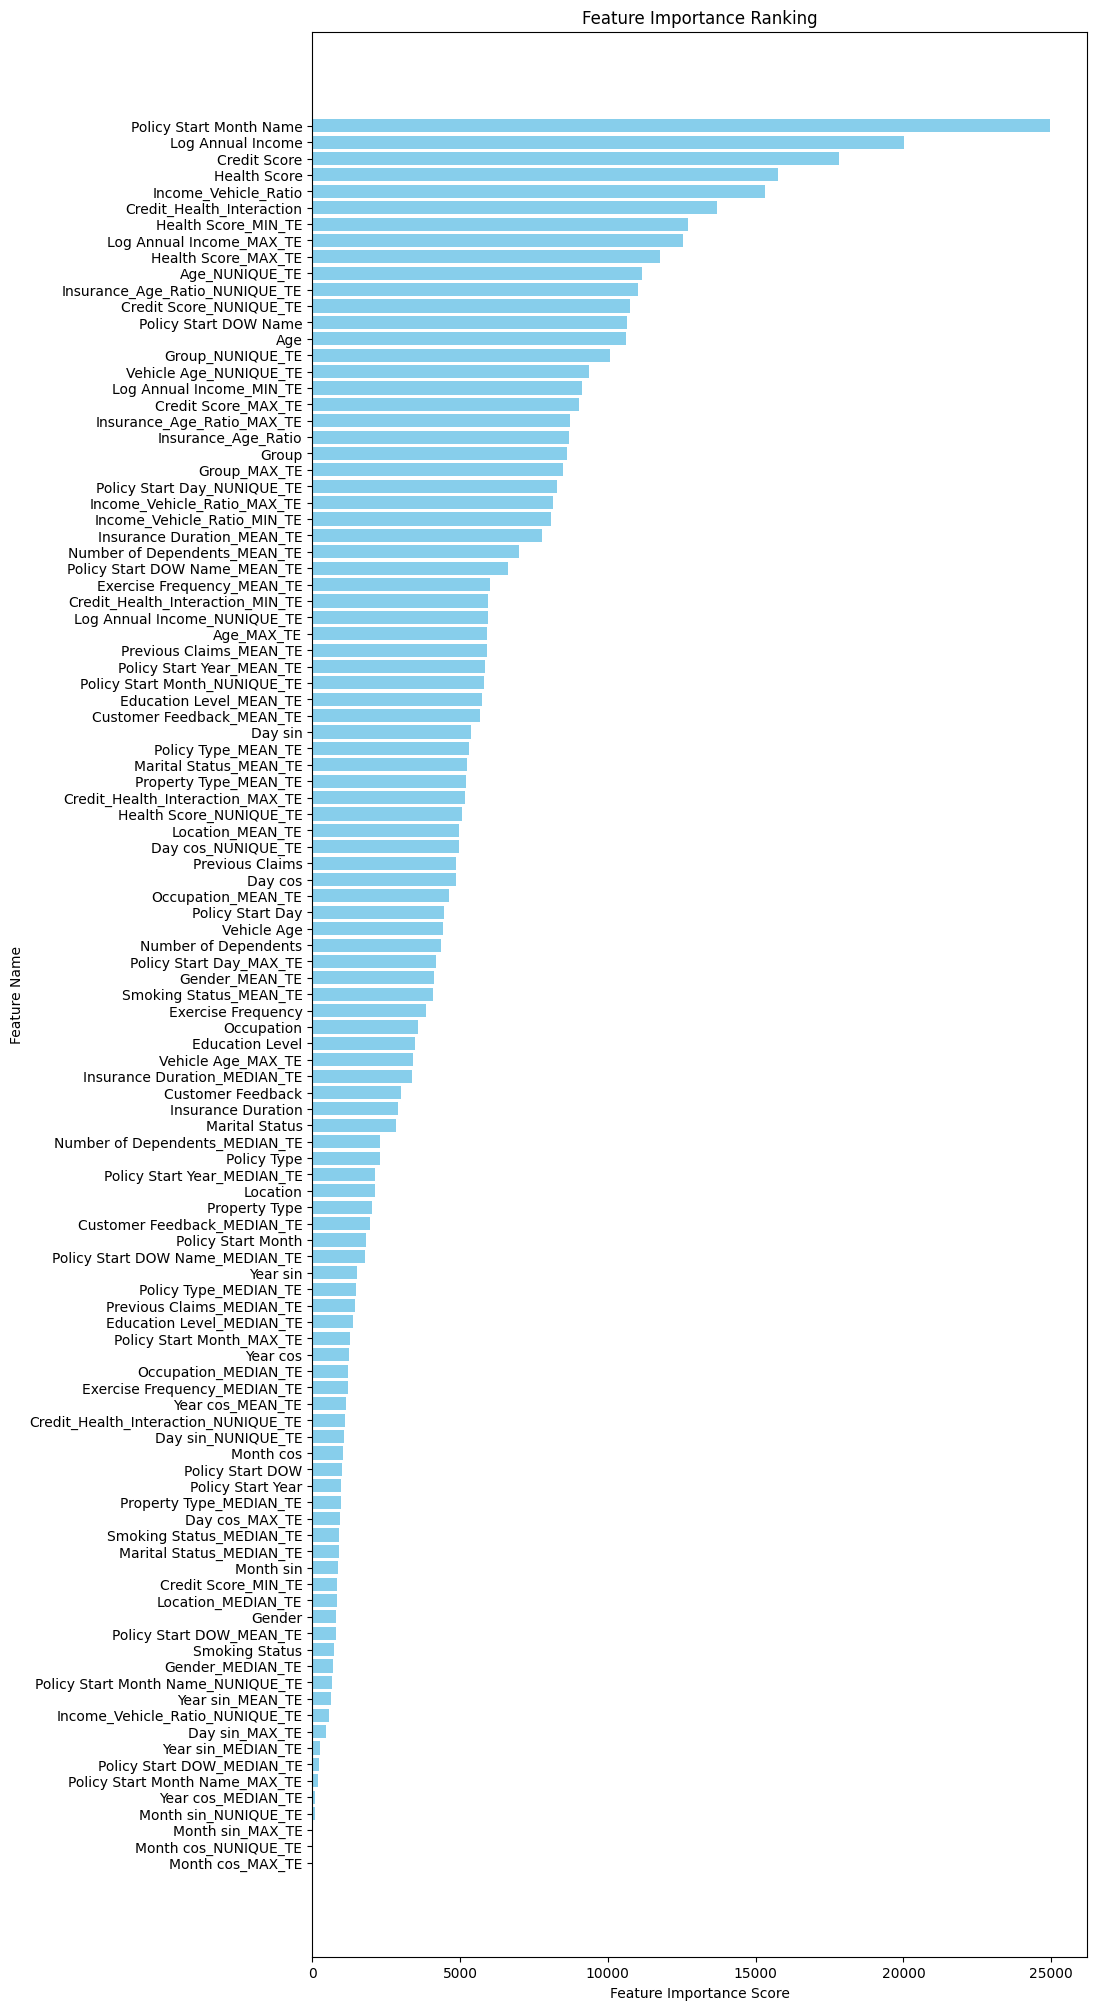

In [ ]:
# Convert to orderable list
sorted_importance2 = sorted(importance2.items(), key=lambda x: x[1], reverse=True)

# Get ordered feature name and importance
features2, scores2 = zip(*sorted_importance2)

plt.figure(figsize=(10, 25))
plt.barh(features2, scores2, color="skyblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.title("Feature Importance Ranking")
plt.gca().invert_yaxis()  # higher importace on top
plt.show()